# Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. In this lecture we will discuss these 3 methods with examples.

____

### Example DataFrames

In [1]:
import pandas as pd

In [2]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [3]:
df1

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

In [4]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [5]:
df2 

A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

In [6]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [7]:
df3

A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [9]:
df2

A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

In [10]:
df3

A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

## Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [9]:
pd.concat([df2,df1,df3])

A    B    C    D
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [11]:
pd.concat([df1,df2,df3],axis=0)

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

_____
## Example DataFrames

In [12]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [13]:
left

key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

In [14]:
right

key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3

___

## Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

### 1. Without any key column

When you use merge(), the simplest call must have two arguments: the left DataFrame and the right DataFrame. For example, to combine df_customer and df_info:

In [15]:
df_customer = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Tom', 'Jenny', 'James', 'Dan'],
})
df_info = pd.DataFrame({
    'id': [2, 3, 4, 5],
    'age': [31, 20, 40, 70],
    'sex': ['F', 'M', 'M', 'F']
})
pd.merge(df_customer, df_info)

id   name  age sex
0   2  Jenny   31   F
1   3  James   20   M
2   4    Dan   40   M

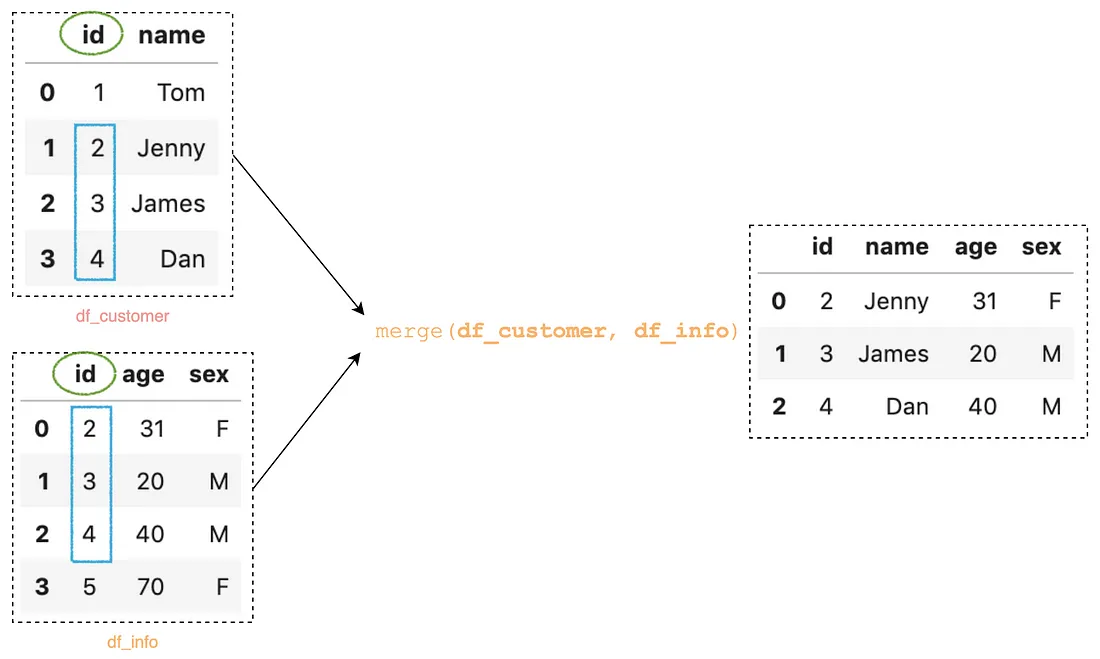

By default, the function will combine data on common columns (It is the column id in our example) and produces only the result that matches in both left and right DataFrames.

The following is an equivalent statement if you prefer to call merge from the left DataFrame.

In [16]:
df_customer.merge(df_info) 

id   name  age sex
0   2  Jenny   31   F
1   3  James   20   M
2   4    Dan   40   M

### 2. Specifying key columns using argument on
You can specify the common columns for merging. To do so, pass an additional argument on as the name of the common column, here 'id' in our example, to merge() function:

In [17]:
pd.merge(df_customer, df_info, on='id')


id   name  age sex
0   2  Jenny   31   F
1   3  James   20   M
2   4    Dan   40   M

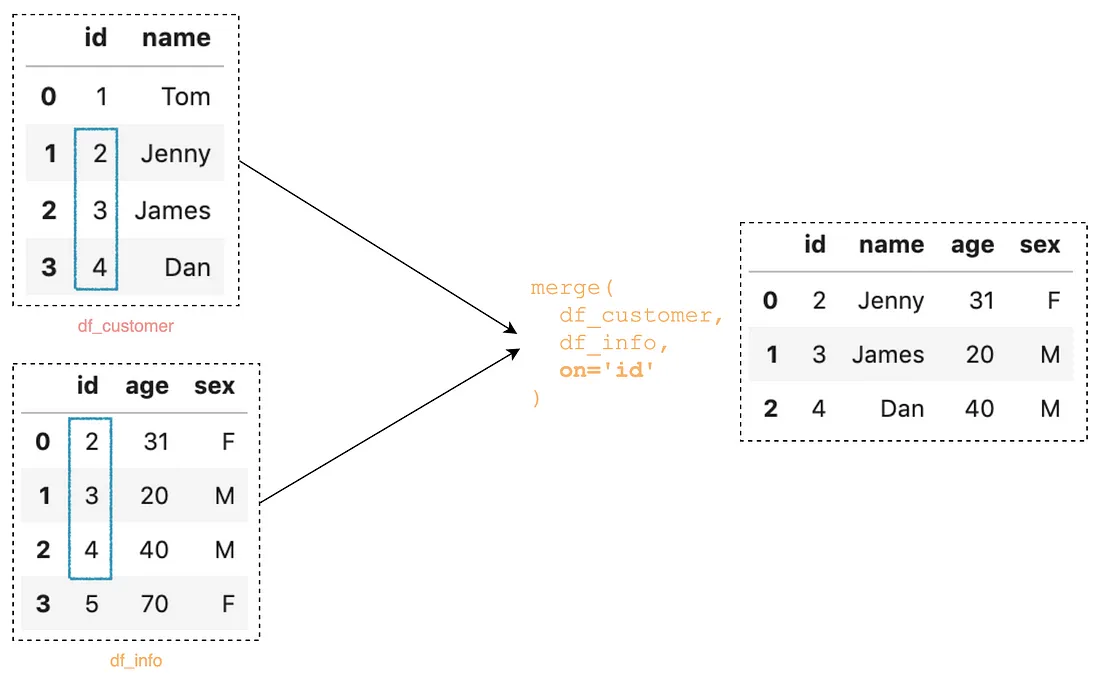

If you use on,you have to make sure the column you specify must be present in both left and right DataFrames.

To combine data on multiple common columns, you can pass a list to on:

In [18]:
# with multiple key columns
df_order = pd.DataFrame({
    'id': [2,3,4,5],
    'name': ['Jenny', 'James', 'Dan', 'leo'],
    'quantity': [2,4,6,10]
})

In [19]:
pd.merge(df_customer, df_order, on=['id', 'name'])

id   name  quantity
0   2  Jenny         2
1   3  James         4
2   4    Dan         6

### 3. Merging using left_on and right_on

It might happen that the column on which you want to merge the DataFrames have different names. For such merges, you will have to specify the left_on as the left DataFrame name and right_on as the right DataFrame name, for example:

In [20]:
df_info_2 = pd.DataFrame({
    'customer_id': [2,3,4,5],
    'age': [31,20,40,70],
    'sex': ['F', 'M', 'M', 'F']
})
df_info_2

customer_id  age sex
0            2   31   F
1            3   20   M
2            4   40   M
3            5   70   F

In [21]:
pd.merge(df_customer, df_info_2, left_on='id', right_on='customer_id')

id   name  customer_id  age sex
0   2  Jenny            2   31   F
1   3  James            3   20   M
2   4    Dan            4   40   M

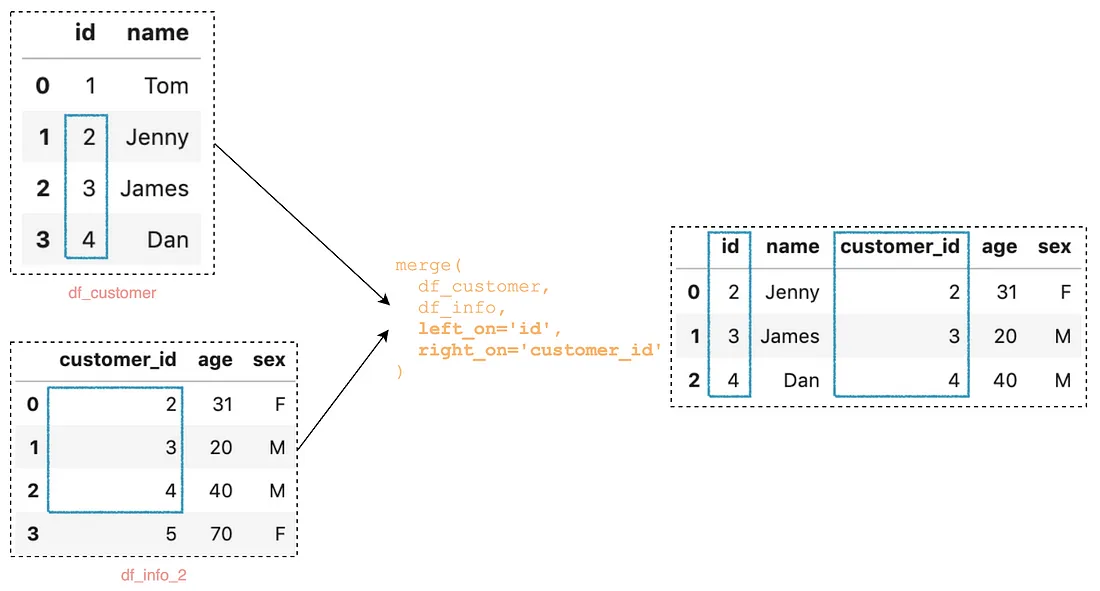

In [65]:
pd.merge(left,right,how='inner',on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3

Or to show a more complicated example:

In [66]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [67]:
left

key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

In [68]:
right

key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3

In [69]:
pd.merge(left, right, on=['key1', 'key2'])

key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2

In [21]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3

In [22]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3

In [23]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN

## Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [46]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [47]:
left.join(right)

A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2

In [48]:
left.join(right, how='outer')

A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3

In [71]:
#Example 1 : Merging two Dataframe with same number of elements :


# importing the module
import pandas as pd

# creating the first DataFrame
df1 = pd.DataFrame({"fruit" : ["apple", "banana", "avocado"],
					"market_price" : [21, 14, 35]})
display("The first DataFrame")
display(df1)

# creating the second DataFrame
df2 = pd.DataFrame({"fruit" : [ "apple", "banana","avocado"],
					"wholesaler_price" : [65, 68, 75]})
display("The second DataFrame")
display(df2)

# joining the DataFrames
display("The merged DataFrame")
pd.merge(df1, df2, on = "fruit", how = "inner")


'The first DataFrame'

fruit  market_price
0    apple            21
1   banana            14
2  avocado            35

'The second DataFrame'

fruit  wholesaler_price
0    apple                65
1   banana                68
2  avocado                75

'The merged DataFrame'

fruit  market_price  wholesaler_price
0    apple            21                65
1   banana            14                68
2  avocado            35                75

In [73]:
# importing the module
import pandas as pd

# creating the first DataFrame
df1 = pd.DataFrame({"fruit" : ["apple", "banana",
							"avocado", "grape"],
					"market_price" : [21, 14, 35, 38]})
display("The first DataFrame")
display(df1)

# creating the second DataFrame
df2 = pd.DataFrame({"fruit" : ["apple", "banana", "grape"],
					"wholesaler_price" : [65, 68, 71]})
display("The second DataFrame")
display(df2)

# joining the DataFrames
# here both common DataFrame elements are in df1 and df2,
# so it extracts apple, banana, grapes from df1 and df2.
display("The merged DataFrame")
pd.merge(df1, df2, on = "fruit", how = "inner")


'The first DataFrame'

fruit  market_price
0    apple            21
1   banana            14
2  avocado            35
3    grape            38

'The second DataFrame'

fruit  wholesaler_price
0   apple                65
1  banana                68
2   grape                71

'The merged DataFrame'

fruit  market_price  wholesaler_price
0   apple            21                65
1  banana            14                68
2   grape            38                71

In [74]:
'''If we use how = "Outer", it returns all elements in df1 and df2 but if element column are null then its return NaN value.'''

pd.merge(df1, df2, on = "fruit", how = "outer") 


fruit  market_price  wholesaler_price
0    apple            21              65.0
1   banana            14              68.0
2  avocado            35               NaN
3    grape            38              71.0

In [75]:
'''If we use how = "left", it returns all the elements that present in the left DataFrame.'''

pd.merge(df1, df2, on = "fruit", how = "left")


fruit  market_price  wholesaler_price
0    apple            21              65.0
1   banana            14              68.0
2  avocado            35               NaN
3    grape            38              71.0

In [76]:
'''If we use how = "right", it returns all the elements that present in the right DataFrame.'''
pd.merge(df1, df2, on = "fruit", how = "right")


fruit  market_price  wholesaler_price
0   apple            21                65
1  banana            14                68
2   grape            38                71

In [77]:
df_customer = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Tom', 'Jenny', 'James', 'Dan'],
})
df_info = pd.DataFrame({
    'id': [2, 3, 4, 5],
    'age': [31, 20, 40, 70],
    'sex': ['F', 'M', 'M', 'F']
})
pd.merge(df_customer, df_info)

id   name  age sex
0   2  Jenny   31   F
1   3  James   20   M
2   4    Dan   40   M

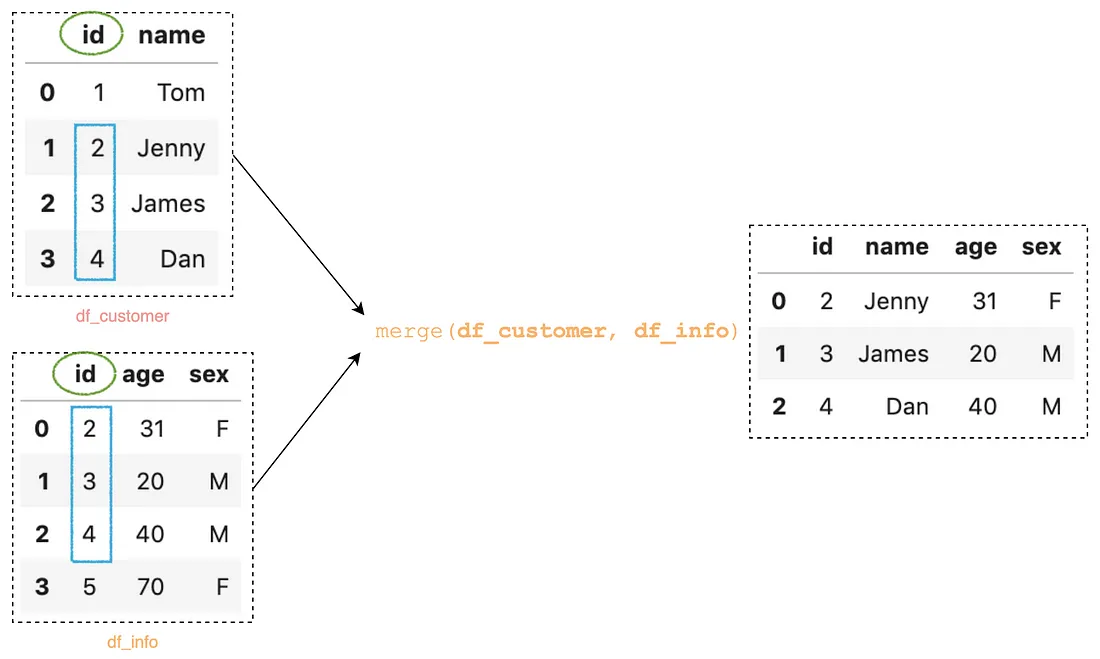

df_customer.merge(df_info) 


Specifying key columns using argument on
You can specify the common columns for merging. To do so, pass an additional argument on as the name of the common column, here 'id' in our example, to merge() function:

In [26]:
pd.merge(df_customer, df_info, on='id')


id   name  age sex
0   2  Jenny   31   F
1   3  James   20   M
2   4    Dan   40   M

In [27]:
pd.merge(
  df_customer, 
  df_info_2, 
  left_on='id', 
  right_on='customer_id'
)

id   name  customer_id  age sex
0   2  Jenny            2   31   F
1   3  James            3   20   M
2   4    Dan            4   40   M

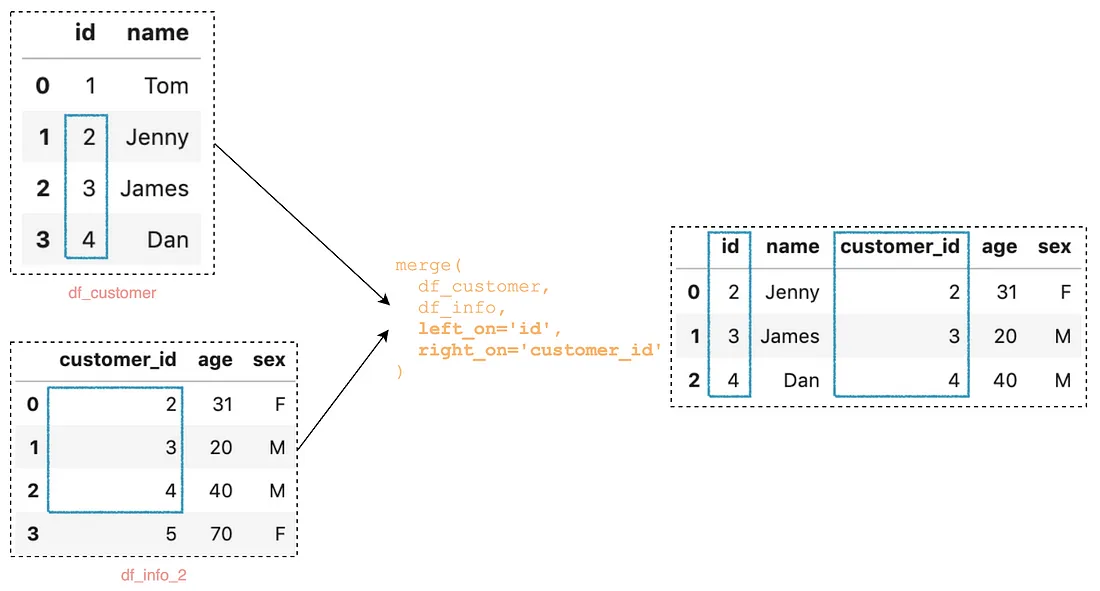

In [80]:
df_customer = pd.DataFrame({
    'id': [1,2,3,4],
    'name': ['Tom', 'Jenny', 'James', 'Dan'],
})
df_order= pd.DataFrame({
    'id': [2, 2, 4, 4],
    'product': ['A', 'B' ,'A', 'C'],
    'quantity': [31, 21, 20,40],
    'date': pd.date_range('2019-02-24', periods=4, freq='D')
})

### Various type of joins: 
inner, left, right and outer
They are 4 types of joins available to Pandas merge() function. The logic behind these joins is very much the same that you have in SQL when you join tables. You can perform a type of join by specifying the how argument with the following values:

1. inner: the default join type in Pandas merge() function and it produces records that have matching values in both DataFrames.


2. left: produces all records from the left DataFrame and the matched records from the right DataFrame.


3. right: produces all records from the right DataFrame and the matched records from the left DataFrame.


4. outer: produces all records when there is a match in either left or right DataFrame.


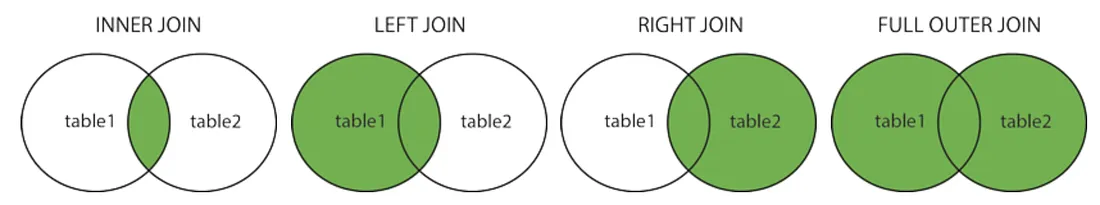

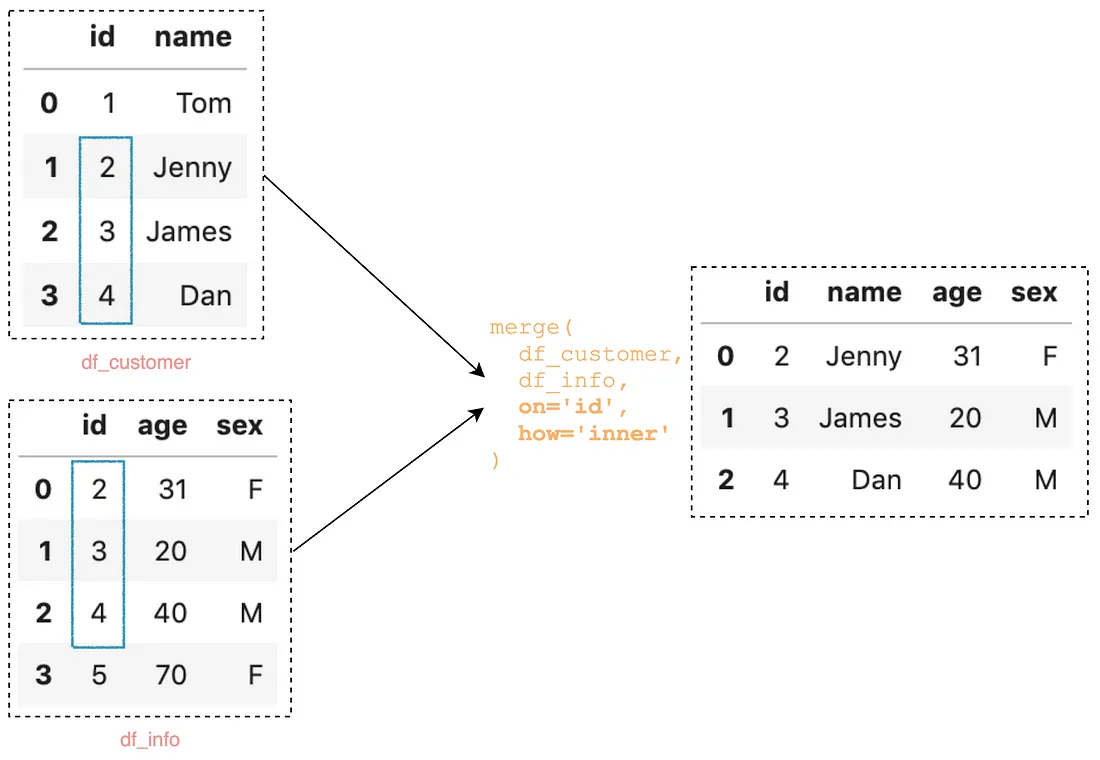

left join
The left join produces all records from the left DataFrame, and the matched records from the right DataFrame. If there is no match, the left side will contain NaN. You can set the argument how='left' to do left join:

#### pd.merge(df_customer, df_info, how='left', on='id')


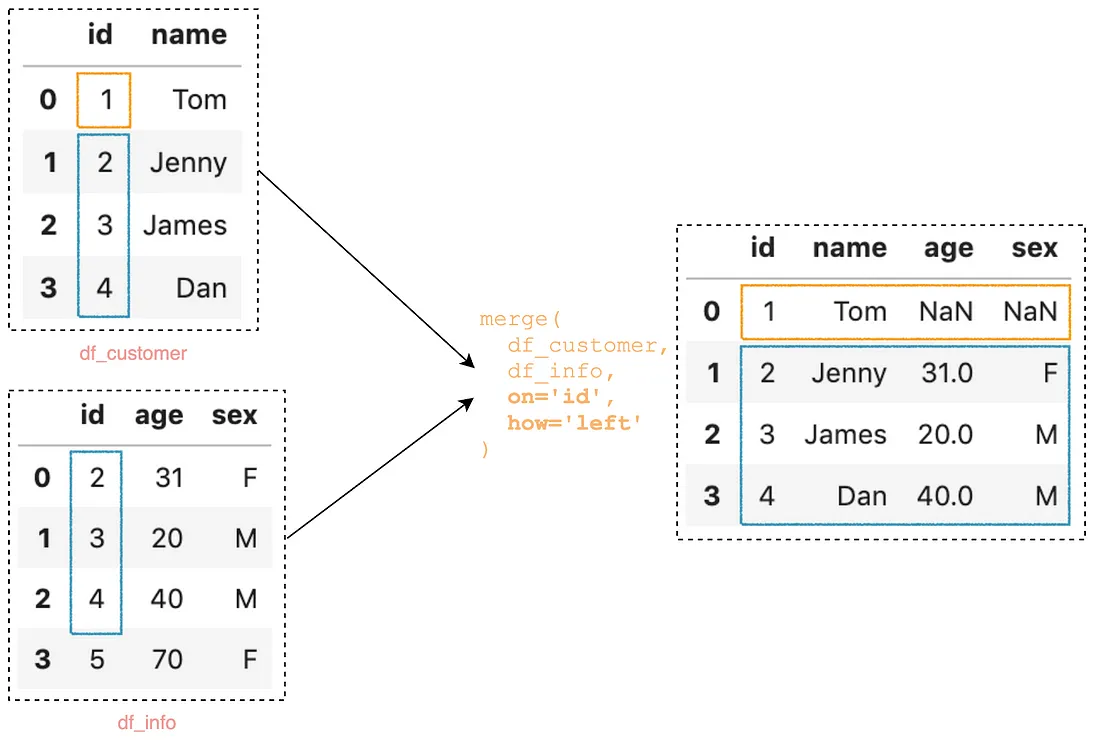

In [22]:
pd.merge(df_customer, df_info, how='left', on='id')

id   name   age  sex
0   1    Tom   NaN  NaN
1   2  Jenny  31.0    F
2   3  James  20.0    M
3   4    Dan  40.0    M

right join
The right join produces all records from the right DataFrame, and the matched records from the left DataFrame. If there is no match, the right side will contain NaN. You can set the argument how='right' to do right join:

In [23]:
pd.merge(df_customer, df_info, how='right', on='id')


id   name  age sex
0   2  Jenny   31   F
1   3  James   20   M
2   4    Dan   40   M
3   5    NaN   70   F

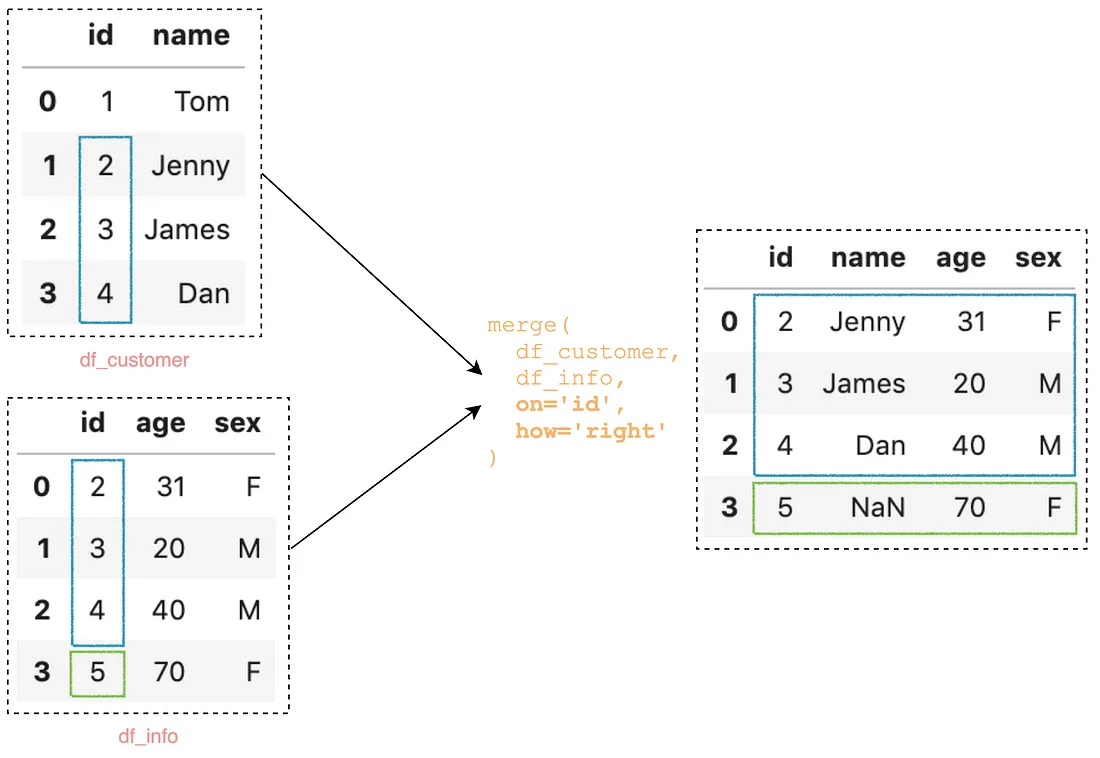

outer join
The outer join produces all records when there is a match in either left or right DataFrame. NaN will be filled for no match on either sides. You can set the argument how='outer' to do outer join:

In [24]:
pd.merge(df_customer, df_info, how='outer', on='id')


id   name   age  sex
0   1    Tom   NaN  NaN
1   2  Jenny  31.0    F
2   3  James  20.0    M
3   4    Dan  40.0    M
4   5    NaN  70.0    F

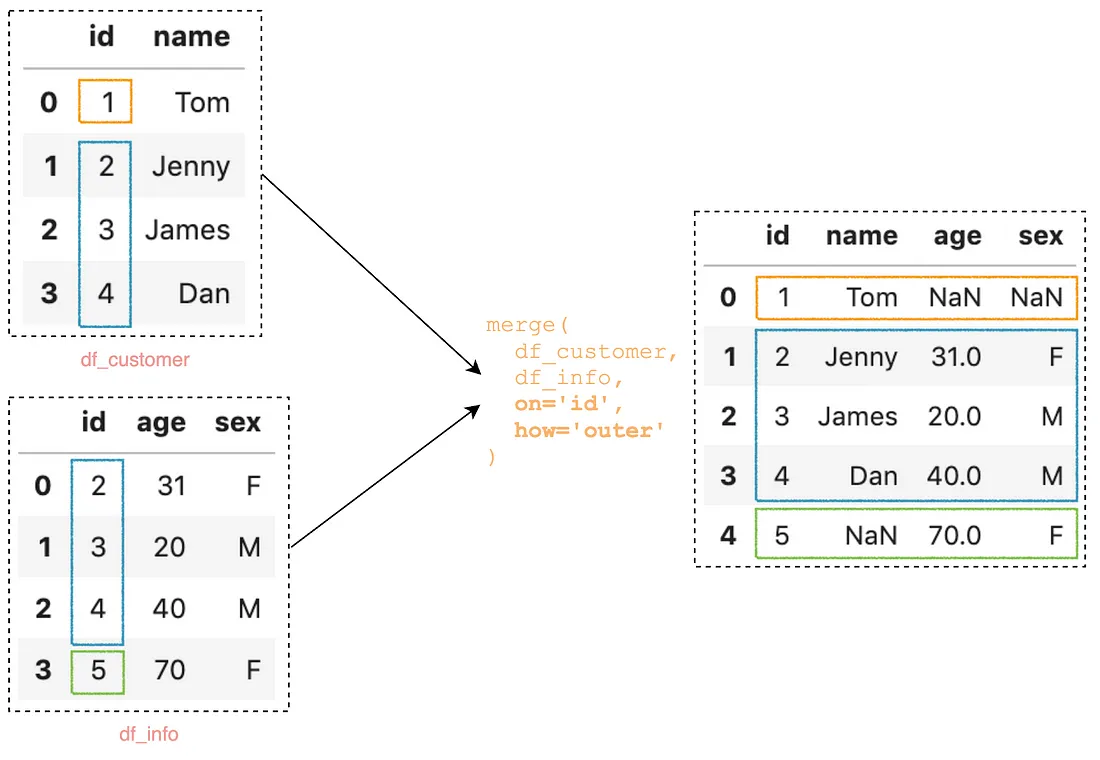

Using validate to avoid invalid records
The result of merge() might have an increased number of rows if the merge keys are not unique. For example

In [25]:
df_customer = pd.DataFrame({
    'id': [1,2,3,4],
    'name': ['Tom', 'Jenny', 'James', 'Dan'],
})
df_order_2 = pd.DataFrame({
    'id': [2, 2, 4, 4],
    'product': ['A', 'B' ,'A', 'C'],
    'quantity': [31, 21, 20,40],
    'date': pd.date_range('2019-02-24', periods=4, freq='D')
})

In [83]:
pd.merge(df_customer, df_order_2, how='left', on='id')


id   name product  quantity       date
0   1    Tom     NaN       NaN        NaT
1   2  Jenny       A      31.0 2019-02-24
2   2  Jenny       B      21.0 2019-02-25
3   3  James     NaN       NaN        NaT
4   4    Dan       A      20.0 2019-02-26
5   4    Dan       C      40.0 2019-02-27

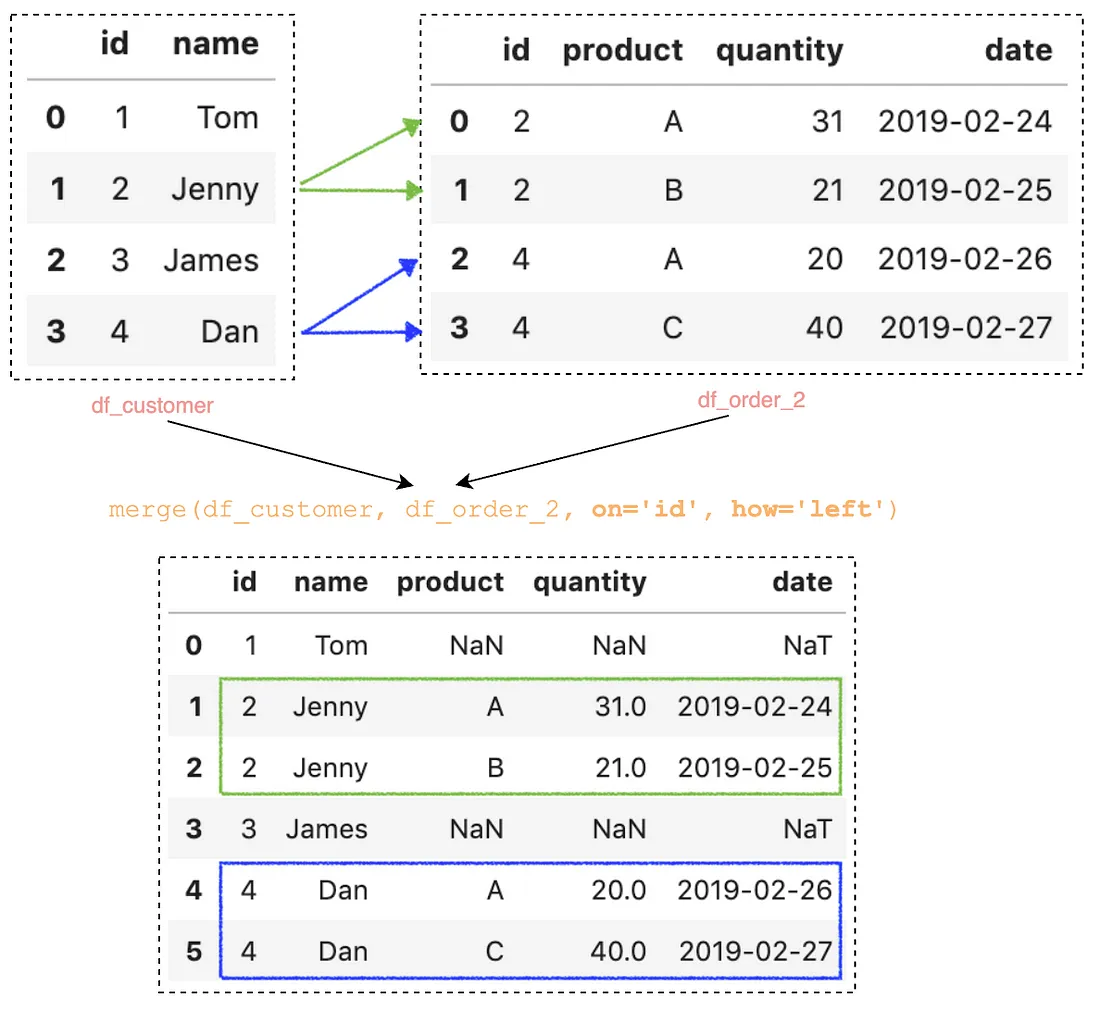

Here are the reasons:

the how='left' will produce all records from df_customer, and the matched records from df_order_2.
In addition, the id in df_order_2 is not unique and all the matching records will be combined and returned.

This is an example of one-to-many merge. It is a valid scenario in our example, in which a customer can have multiple orders. However, one-to-many might be invalid in some other cases, for example, there are two records with the id value 2 in df_info

In [28]:
df_customer = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Tom', 'Jenny', 'James', 'Dan'],
})
df_info = pd.DataFrame({
    'id': [2, 2, 3, 4, 5],
    'age': [31, 21, 20, 40, 70],
    'sex': ['F', 'F', 'M', 'M', 'F']
})

In [29]:
pd.merge(df_customer, df_info, how='left', on='id')


id   name   age  sex
0   1    Tom   NaN  NaN
1   2  Jenny  31.0    F
2   2  Jenny  21.0    F
3   3  James  20.0    M
4   4    Dan  40.0    M

In [30]:
import pandas as pd

# create dataframe
df_marks = pd.DataFrame({'name': ['Somu', 'Kiku', 'Amol', 'Lini'],
     'physics': [68, 74, 77, 78],
     'chemistry': [84, 56, 73, 69],
     'algebra': [78, 88, 82, 87]})

# create excel writer
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel sheet named 'marks'
df_marks.to_excel(writer, 'marks')
# save the excel file
writer.save()
print('DataFrame is written successfully to Excel Sheet.')

DataFrame is written successfully to Excel Sheet.


In [31]:
pd.merge(df_customer, df_info, how='left', on='id', validate='1:1')

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

The argument validate takes one of the following values, so you can use it to validate different merge outputs.

##### one_to_one or 1:1 : check if merge keys are unique in both left and right datasets.

##### one_to_many or 1:m: check if merge keys are unique in left dataset.

##### many_to_one or m:1: check if merge keys are unique in right dataset.

##### many_to_many or m:m: allowed, but does not result in checks.

# Great Job!